# Comparison between single and double q learning agents in 10-bandit problem

Import environment and necessary libraries.
Initialize rewards, total rewards, epsilon and episodes

In [1]:
import gym
import gym_envs
import numpy as np
from math import e

%matplotlib inline
import matplotlib.pyplot as plt

reward_list = []
reward_list_d = []
total_reward = 0
total_reward_d = 0

epsilon = 0.1
alpha = 0.1
gamma = 1
max_episodes = 100

Double q learning agent

In [2]:
env = gym.make("NArmedBandit-v0")
env.seed(10)
table_q_a = np.zeros(env.action_space.n)
table_q_b = np.zeros(env.action_space.n)
env.reset()

for episode in np.arange(max_episodes):
    if env.np_random.uniform() < epsilon:
        action = env.np_random.randint(env.action_space.n)
    else:
        action = np.argmax((table_q_a+table_q_b))
    _, reward, _, _ = env.step(action)
    if env.np_random.uniform()<0.5:
        table_q_a[action] = table_q_a[action] + alpha*(reward+gamma*table_q_b[np.argmax(table_q_a)]-table_q_a[action])
    else:
        table_q_b[action] = table_q_b[action] + alpha*(reward+gamma*table_q_a[np.argmax(table_q_b)]-table_q_b[action])

    total_reward_d +=reward
    reward_list_d.append(total_reward_d/(episode+1))

Single q learning agent

In [3]:
table_q = np.zeros(env.action_space.n)
env.reset()

for episode in np.arange(max_episodes):
    if env.np_random.uniform() < epsilon:
        action = env.np_random.randint(env.action_space.n)
    else:
        action = np.argmax(table_q)
    _, reward, _, _ = env.step(action)
    table_q[action] = table_q[action] + alpha*(reward+gamma*np.max(table_q)-table_q[action])

    total_reward +=reward
    reward_list.append(total_reward/(episode+1))
    
    np.set_printoptions(precision=3)
    print(table_q)

[0.283 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.494 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.728 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[1.009 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[1.248 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[1.326 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[1.326 0.    0.    0.    0.    0.    0.    0.    0.193 0.   ]
[1.648 0.    0.    0.    0.    0.    0.    0.    0.193 0.   ]
[1.648 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[1.865 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[1.906 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[2.095 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[2.263 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[2.338 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[2.487 0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[2.62  0.    0.381 0.    0.    0.    0.    0.    0.193 0.   ]
[2.733 0

Visualize the data<br>
Graphs of average reward over 50 actions

Text(0,0.5,'Reward')

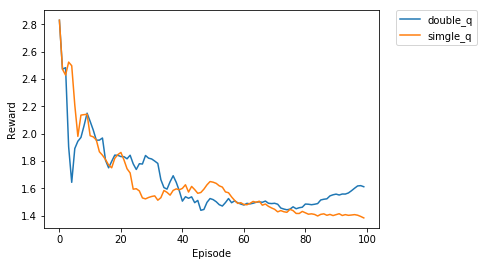

In [4]:
plt.plot(reward_list_d, label='double_q')
plt.plot(reward_list, label='simgle_q')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Episode')
plt.ylabel('Reward')

Total rewards

In [5]:
print("Total rewards")
print('{:10} {:.3f}'.format("Double q:", total_reward_d))
print('{:10} {:.3f}'.format("Single q:", total_reward))
print('{:10} {:.3f}'.format("Optimal:", max_episodes*env.getmax()))

Total rewards
Double q:  161.238
Single q:  138.454
Optimal:   253.644


Approximated Q-values of each action

In [6]:
print("Q-value approximations:")
np.set_printoptions(precision=3)
print('{:10}'.format("Double q_a:"),end=" ")
print(table_q_a)
print('{:10}'.format("Double q_b:"),end=" ")
print(table_q_b)
print('{:10}'.format("Single q:"),end=" ")
print(table_q)
env.render()

Q-value approximations:
Double q_a: [8.42  0.135 0.    0.    0.    0.    0.219 0.    0.317 0.148]
Double q_b: [7.835 0.247 0.346 0.    1.155 0.    0.61  0.467 0.    0.   ]
Single q:  [13.163  0.866  1.038  1.258  1.417  0.     1.007  1.134  0.577  0.807]
True vals: [ 1.593  0.682  1.496  0.192  2.536 -0.339 -0.164 -0.764 -0.291 -0.609 ]
